##로지스틱 회귀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

선형 회귀 계열의 로지스틱 회귀는 데이터 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로 데이터에 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤 train_test_split()을 이용해 데이터 세트를 분리

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardScalser()로 평균이 0,분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(data_scaled, cancer.target, test_size=0.3,random_state=0)

In [8]:
X_train[0]

array([-0.74902829, -1.09363975, -0.74055999, -0.71099466,  0.58638323,
       -0.41808829, -0.44845498, -0.75393607, -0.11908877,  0.41711442,
       -0.72823773, -0.09226561, -0.64307408, -0.57198019, -0.6946878 ,
       -0.24245658,  0.32050519, -0.60960616, -0.25575397, -0.06842713,
       -0.80124161, -0.61509735, -0.75123496, -0.72598829,  0.1241172 ,
       -0.3388401 , -0.06039354, -0.61357437,  0.06510643,  0.43524596])

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy:{:0.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc:{:0.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy:0.977
roc_auc:0.972


In [13]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2','l1'], 'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf,param_grid = params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0},최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'},최적 평균 정확도:0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'},최적 평균 정확도:0.975

## 회귀 트리

###RandomForestRegressor  


In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [15]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
y_target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [17]:
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
rf = RandomForestRegressor(random_state=0,n_estimators=1000)   #생성할 tree의 개수
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [19]:
neg_mse_scores

array([ -7.88289687, -13.14313491, -20.57389346, -46.22586666,
       -18.87809457])

In [20]:
print('5 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE:{0:.3f}',format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE:{0:.3f} 4.422538982804892


###get_model_cv_prediction()  
입력모델과 데이터 세트를 입력받아 교차 검증으로 평균 RMSE를 계산해주는 함수

In [21]:
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####',model.__class__.__name__,'#####')
    print('5 교차 검증의 평균 RMSE:{0:.3f}'.format(avg_rmse))

In [22]:
#다양한 유형의 회귀 트리를 생성해보자
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE:5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE:4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE:4.269
[06:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
5 교차 검증의 평균 RMSE:4.089
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE:4.646


피처별 중요도를 살펴보자

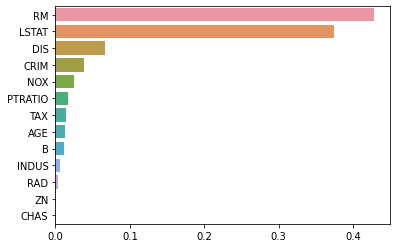

In [23]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

#앞 예제에서 만들어진 X_data,y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

(506, 2)


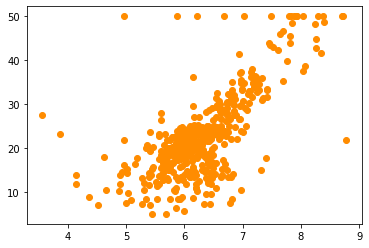

In [24]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bonstonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c='darkorange')

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2,7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 에측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행
lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

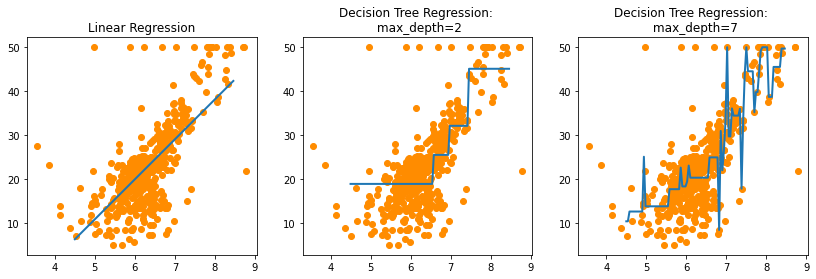

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(14,4),ncols=3)

#X축 값을 4.5~8.5 로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
#선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c='darkorange')
ax1.plot(X_test,pred_lr,label='linear',linewidth=2)

#DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c='darkorange')
ax2.plot(X_test,pred_rf2,label='max_depth:3',linewidth=2)

#DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c='darkorange')
ax3.plot(X_test,pred_rf7,label='max_depth:7',linewidth=2)

선형 회귀는 직선으로 예측 회귀선을 표현하는 데 반해, 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. DecisionTreeRegressor의 max_depth = 7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었다.